### ASTR 3890 - Selected Topics: Data Science for Large Astronomical Surveys (Spring 2022)
***N. Hernitschek***
___

# Homework 2
### Due: Monday, Feb 7th at 11.00am CST

The completed lecture notebook must also be submitted by 11:00am Central Time on Feb 7th.

---

## Problem 1

In the lecture you have seen how to fetch and plot quasar spectra using `fetch_sdss_spectrum` given the three parameters plate id, mjd, fiber id.

Look at the spectra of a number of quasars at different redshifts. How do the spectra change as redshift increases? 
(Hint: to get many quasars, try to vary the three parameters. The redshift $z$ is in the plot.)

Make a graph of quasar color as a function of redshift. How do you explain what you see in the graph?

How do spectra change at increasing redshift?


### Solution

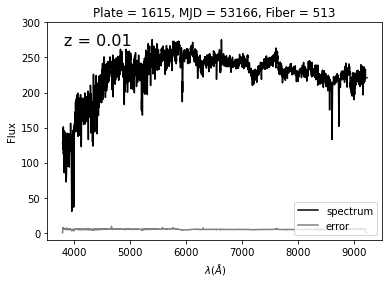

In [1]:
#Task 1: Investigate spectra of various quasars at different redshifts

from matplotlib import pyplot as plt
from astroML.datasets import fetch_sdss_spectrum

# Spectrum 1
plate = 1615
mjd = 53166
fiber = 513

spec1 = fetch_sdss_spectrum(plate, mjd, fiber)

# Plot of Spectrum 1
ax = plt.axes()
ax.plot(spec1.wavelength(), spec1.spectrum, '-k', label='spectrum')
ax.plot(spec1.wavelength(), spec1.error, '-', color='gray', label='error')
ax.legend(loc=4)
ax.set_title('Plate = %(plate)i, MJD = %(mjd)i, Fiber = %(fiber)i' % locals())
ax.text(0.05, 0.95, 'z = %.2f' % spec1.z, size=16,
        ha='left', va='top', transform=ax.transAxes)
ax.set_xlabel(r'$\lambda (\AA)$')
ax.set_ylabel('Flux')
ax.set_ylim(-10, 300)

plt.show()


[========================================]  182.8kb / 182.8kb   
caching to C:\Users\jerry\astroML_data\SDSSspec\0282\spSpec-51630-0282-513.fit


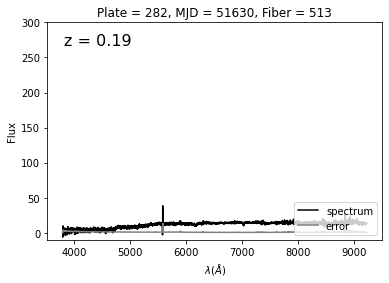

In [2]:
# Spectrum 2
plate = 282
mjd = 51630
fiber = 513

spec2 = fetch_sdss_spectrum(plate, mjd, fiber)

# Plot of Spectrum 2
ax = plt.axes()
ax.plot(spec2.wavelength(), spec2.spectrum, '-k', label='spectrum')
ax.plot(spec2.wavelength(), spec2.error, '-', color='gray', label='error')
ax.legend(loc=4)
ax.set_title('Plate = %(plate)i, MJD = %(mjd)i, Fiber = %(fiber)i' % locals())
ax.text(0.05, 0.95, 'z = %.2f' % spec2.z, size=16,
        ha='left', va='top', transform=ax.transAxes)
ax.set_xlabel(r'$\lambda (\AA)$')
ax.set_ylabel('Flux')
ax.set_ylim(-10, 300)

plt.show()


[========================================]  182.8kb / 182.8kb   
caching to C:\Users\jerry\astroML_data\SDSSspec\3006\spSpec-54632-3006-513.fit


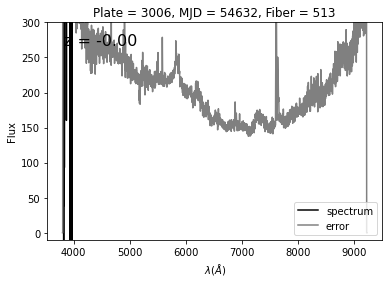

In [3]:
# Spectrum 3
plate = 3006
mjd = 54632
fiber = 513

spec3 = fetch_sdss_spectrum(plate, mjd, fiber)

# Plot of Spectrum 3
ax = plt.axes()
ax.plot(spec3.wavelength(), spec3.spectrum, '-k', label='spectrum')
ax.plot(spec3.wavelength(), spec3.error, '-', color='gray', label='error')
ax.legend(loc=4)
ax.set_title('Plate = %(plate)i, MJD = %(mjd)i, Fiber = %(fiber)i' % locals())
ax.text(0.05, 0.95, 'z = %.2f' % spec3.z, size=16,
        ha='left', va='top', transform=ax.transAxes)
ax.set_xlabel(r'$\lambda (\AA)$')
ax.set_ylabel('Flux')
ax.set_ylim(-10, 300)

plt.show()


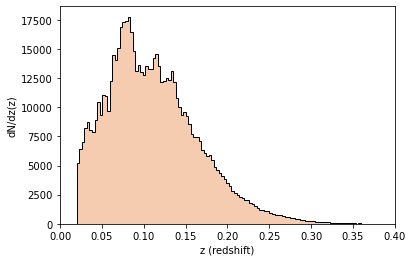

In [8]:
#Task 2: Make a graph of quasar color as a function of redshift and explain

from astropy.visualization import hist

from astroML.datasets import fetch_sdss_specgals
data = fetch_sdss_specgals()

plt.figure()
hist(data['z'], bins='knuth',
     histtype='stepfilled', ec='k', fc='#F5CCB0')
plt.xlim(0, 0.4)
plt.xlabel('z (redshift)')
plt.ylabel('dN/dz(z)')

plt.show()

#Redshift peaks around 0.075

Task 3: How do spectra change at increasing redshift?

With increasing redshift, there is a corresponding increase in the wavelength. As the spectral lines of wavelength get longer, we can infer that the various spectrum of quasars are increasing in distance away from Earth.

## Problem 2

Scatter plots are very useful when visualizing rather sparse, small data sets. Density plots are the right tool for visualizing rather dense, large data sets. 
As many astronomical data sets have both dense and sparse regions, a combination of both is often used.

Using data obtained with `fetch_sdss_S82standards`, generate a scatter plot with contours over dense regions.

### Solution



C:\Users\jerry\anaconda3\envs\astr3890\lib\site-packages\astroML\linear_model\linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


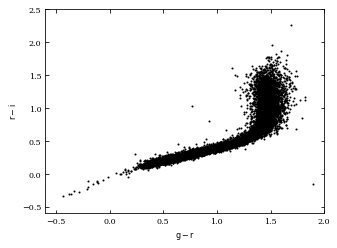

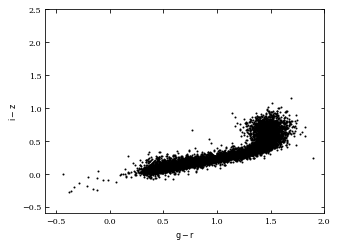

In [9]:
#Task: Generate scatter plot with contours over dense regions

from matplotlib import pyplot as plt
from astroML.datasets import fetch_sdss_S82standards

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)
#------------------------------------------------------------

data = fetch_sdss_S82standards()
data = data[:10000]
g = data['mmu_g']
r = data['mmu_r']
i = data['mmu_i']
z = data['mmu_z']

# Plot the g-r vs r-i colors
fig, ax = plt.subplots(figsize=(5, 3.75))
ax.plot(g - r, r - i, marker='.', markersize=2,
        color='black', linestyle='none')
ax.set_xlim(-0.6, 2.0)
ax.set_ylim(-0.6, 2.5)
ax.set_xlabel(r'${\rm g - r}$')
ax.set_ylabel(r'${\rm r - i}$')

plt.show()

# Plot the g-r vs i-z colors
fig, ax = plt.subplots(figsize=(5, 3.75))
ax.plot(g - r, i - z, marker='.', markersize=2,
        color='black', linestyle='none')
ax.set_xlim(-0.6, 2.0)
ax.set_ylim(-0.6, 2.5)
ax.set_xlabel(r'${\rm g - r}$')
ax.set_ylabel(r'${\rm i - z}$')

plt.show()
